In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import os
from simulation import simulator_utils as s_utils
import pprint
import numpy as np
pp = pprint.PrettyPrinter(indent=2)
reload(s_utils)
%matplotlib inline
#files = [f for f in os.listdir('simulation/summaries/compressed/') if 'swap_step' in f]
#files = [f for f in os.listdir('simulation/summaries/') if 'compressed' not in f]
files = [f for f in os.listdir('simulation/summaries/compressed/') if 'cnn' in f and 'swap_step' in f]
mese = s_utils.MultiExperimentSummaryExtractor(files)

10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations


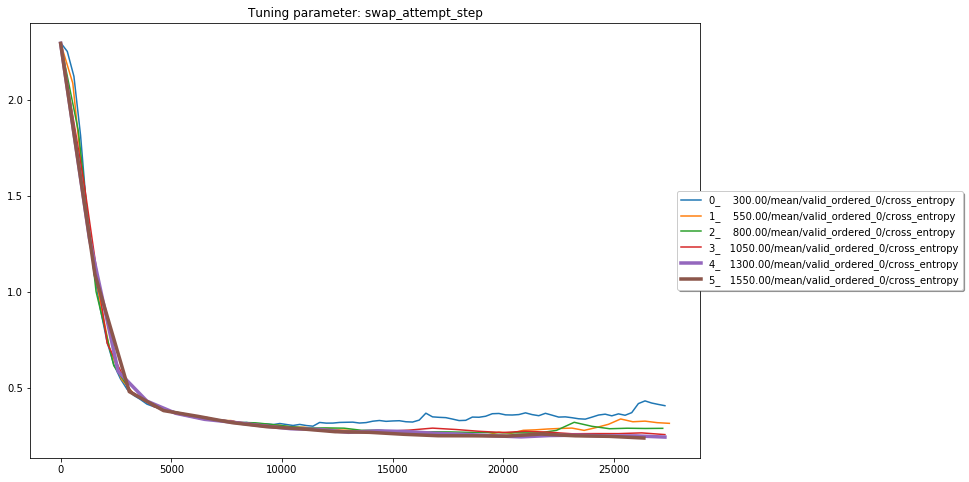

In [2]:
"""Swap step for validation dataset. Average best cross entropy value from 10 simulations each."""
fig = mese.plot(['cross', 'valid', 'ordered_0'], param_min=None, mark_lines=[1300, 1550])


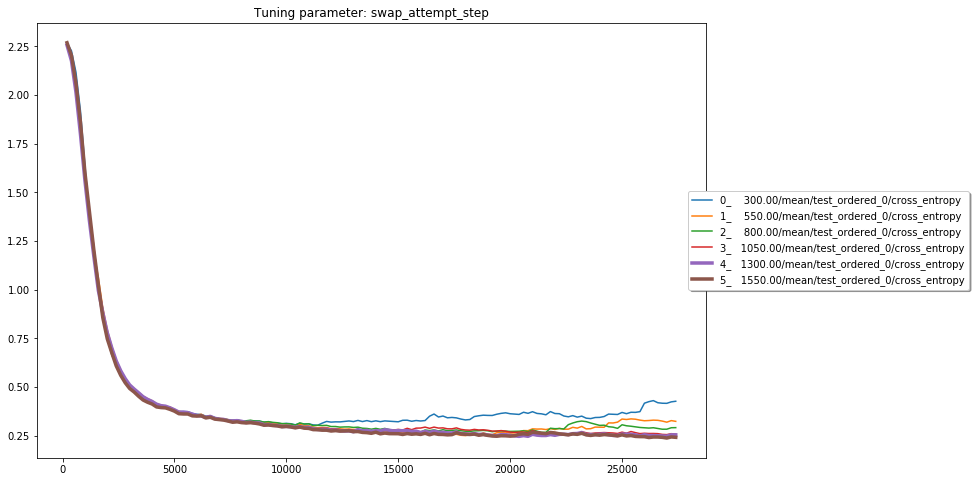

In [3]:
"""Swap step for test dataset. Average best cross entropy value from 10 simulations each."""

fig = mese.plot(['ordered_0', 'cross', 'test'], mark_lines=[1300, 1550])

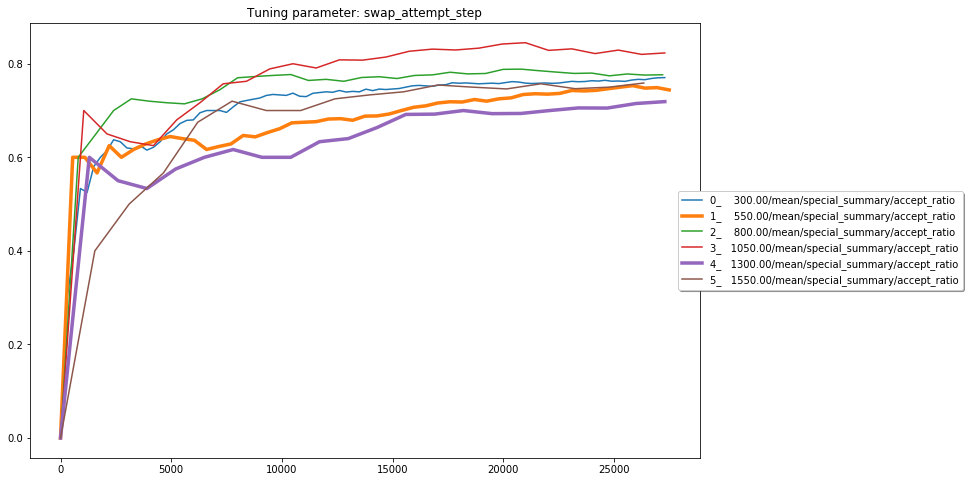

In [4]:
"""average accept ratio from 10 simulation each."""
fig = mese.plot(['accept_ratio'],match='exact', mark_lines=[550, 1300])

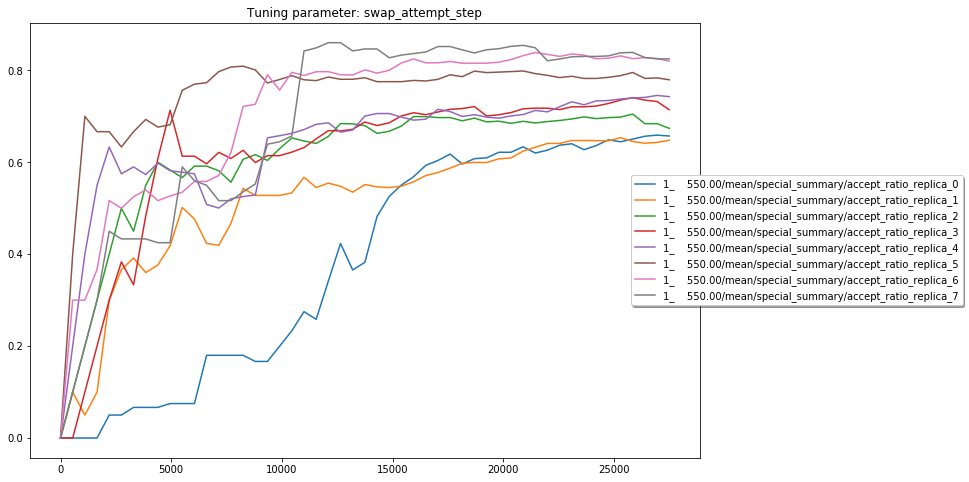

In [5]:
"""Accept ratio for each replica for step 550 from 10 simulations"""
fig = mese.plot(['accept_ratio_replica'], param_min=550, param_max=550, mark_lines=[4])


In [6]:
"""Temperature factor. Constant swap attempt step = 800"""
files = [f for f in os.listdir('simulation/summaries/compressed/') if 'cnn' in f and 'temp_factor' in f and 'dynamic' in f]
reload(s_utils)
mese1 = s_utils.MultiExperimentSummaryExtractor(files)

10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations


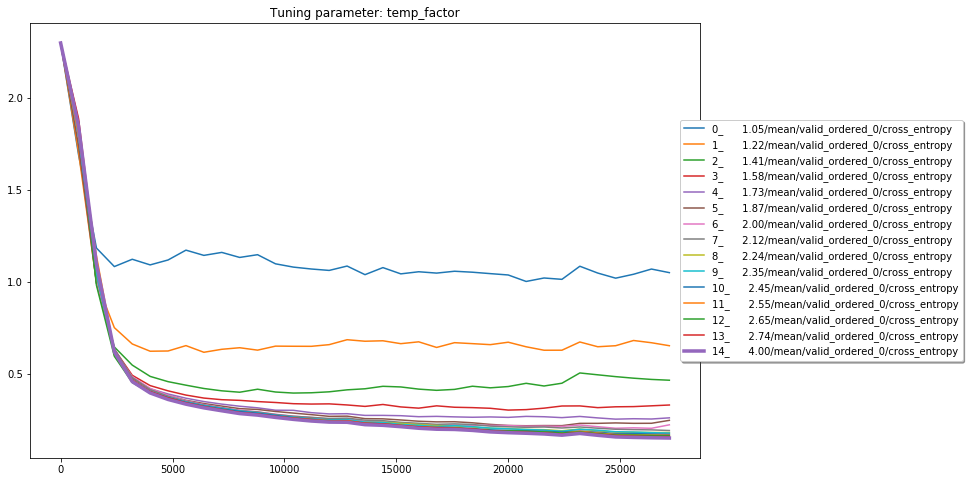

In [7]:
"""Best average cross entropy value for validation dataset."""
fig = mese1.plot(['cross', 'valid', 'ordered_0'], param_min=None, mark_lines=[4])


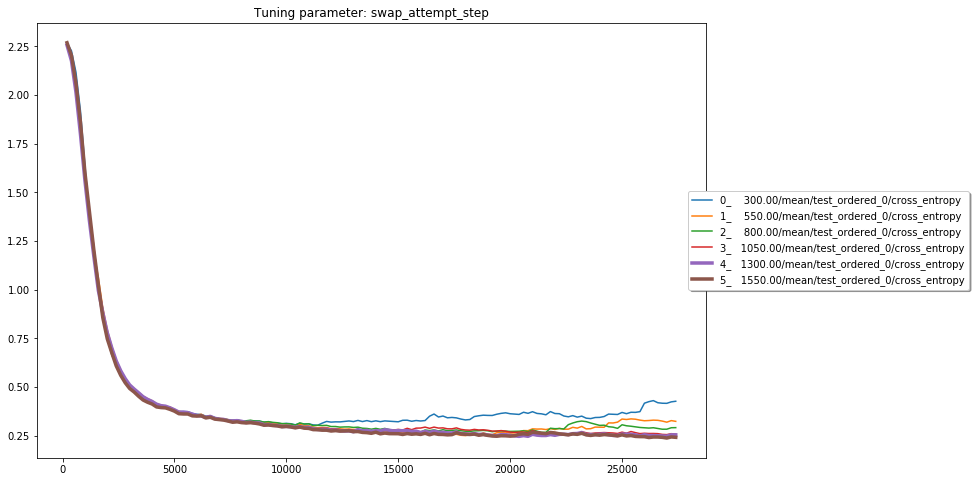

In [8]:
"""Best average cross entropy value for test dataset."""
fig = mese.plot(['ordered_0', 'cross', 'test'], mark_lines=[1300, 1550])

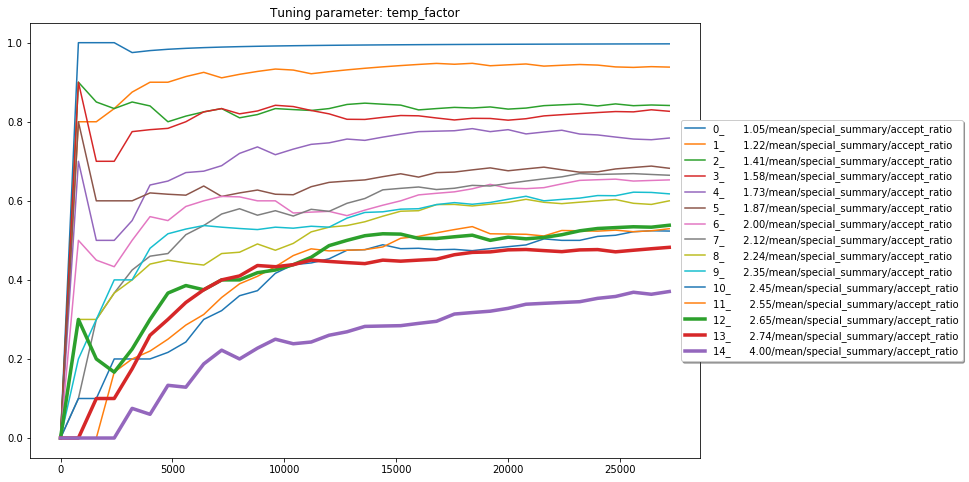

In [9]:
"""average accept ratio"""
fig = mese1.plot(['accept_ratio'],match='exact', mark_lines=[2.74, 4, 2.65])

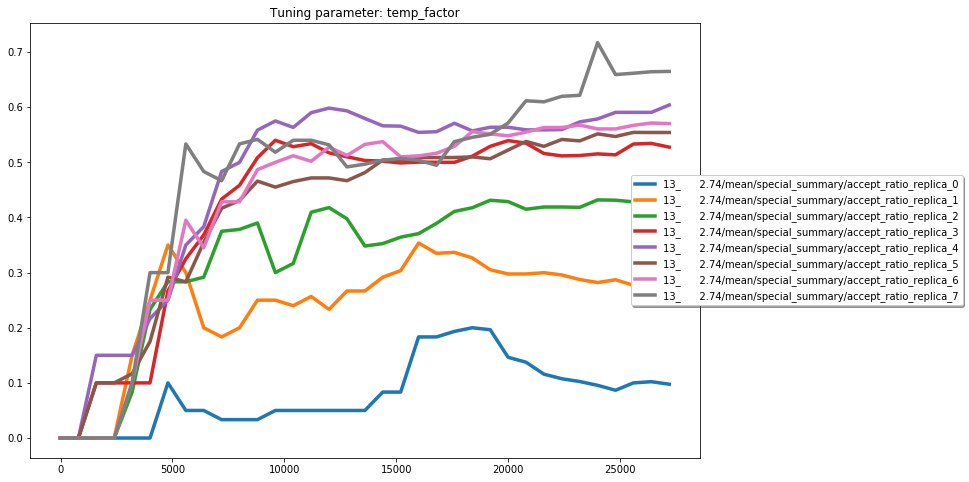

In [10]:
v = 2.74
fig = mese1.plot(['accept_ratio_replica'], param_min=v, param_max=v, mark_lines=[2.74])


10 simulations


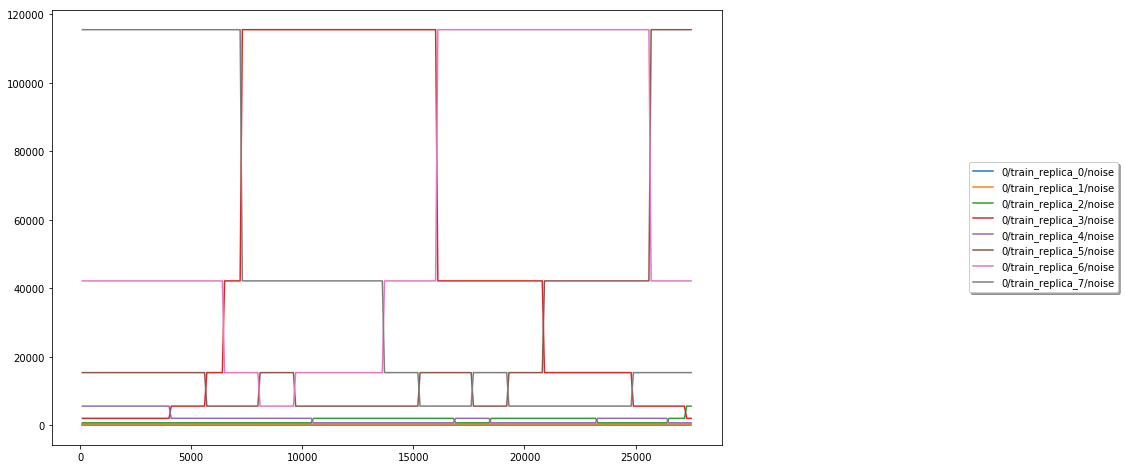

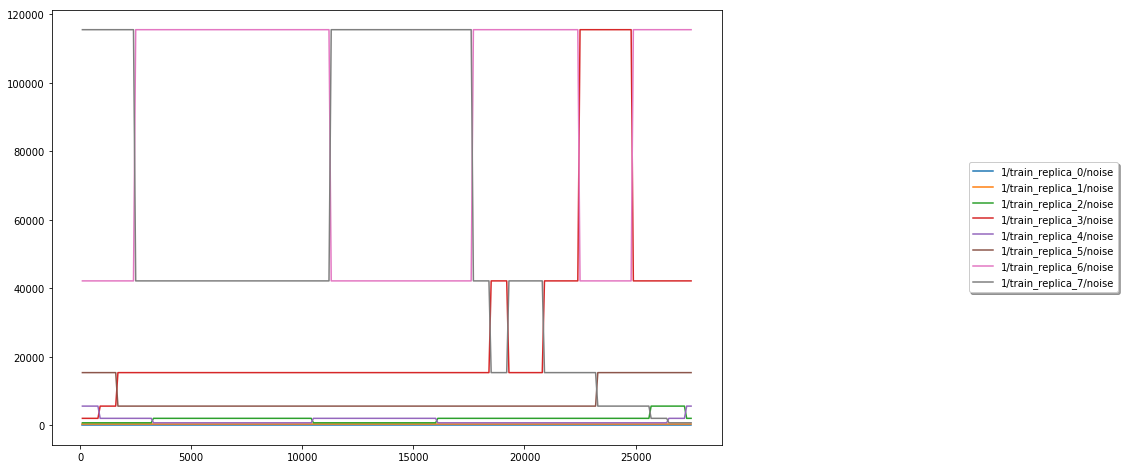

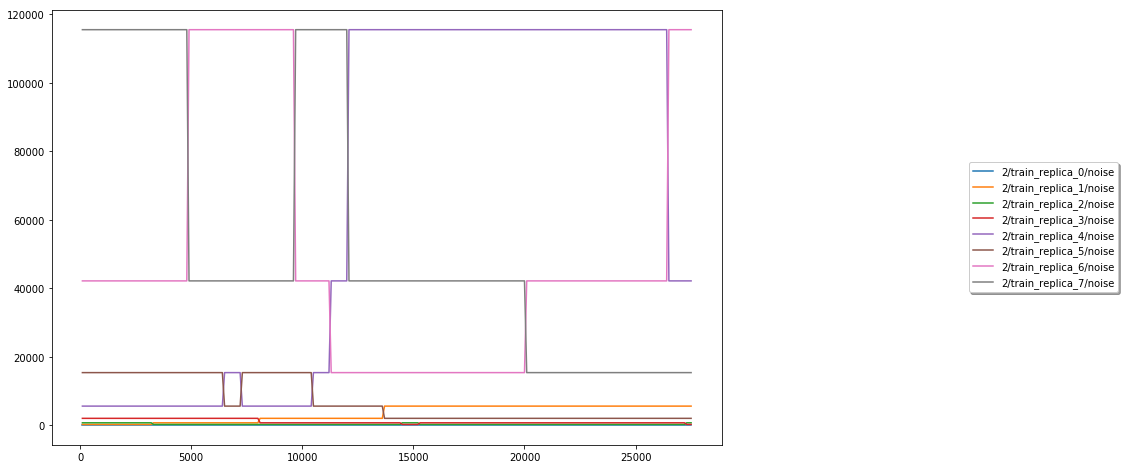

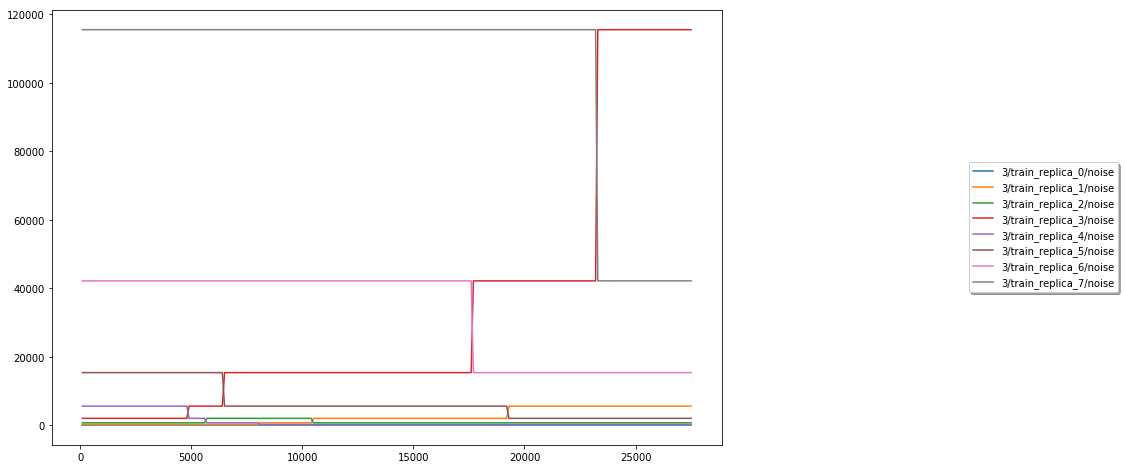

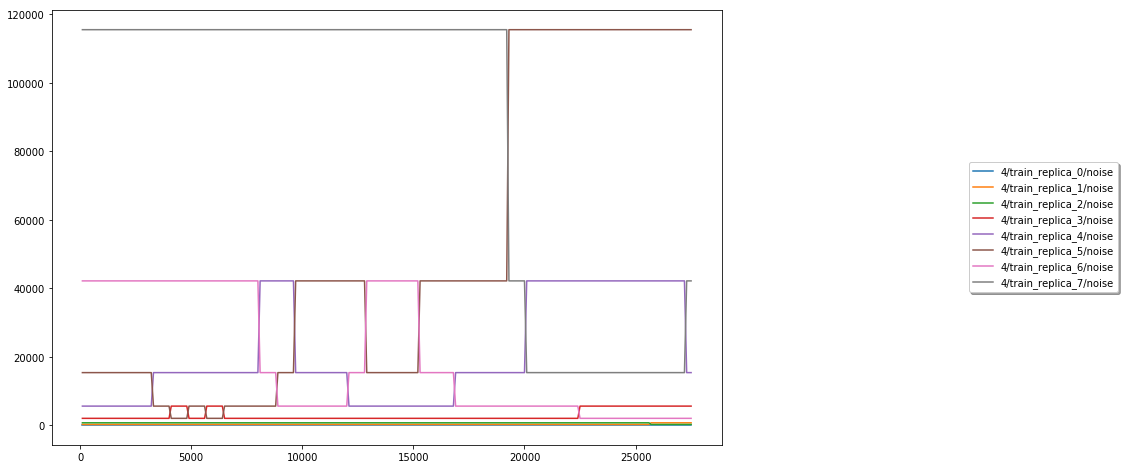

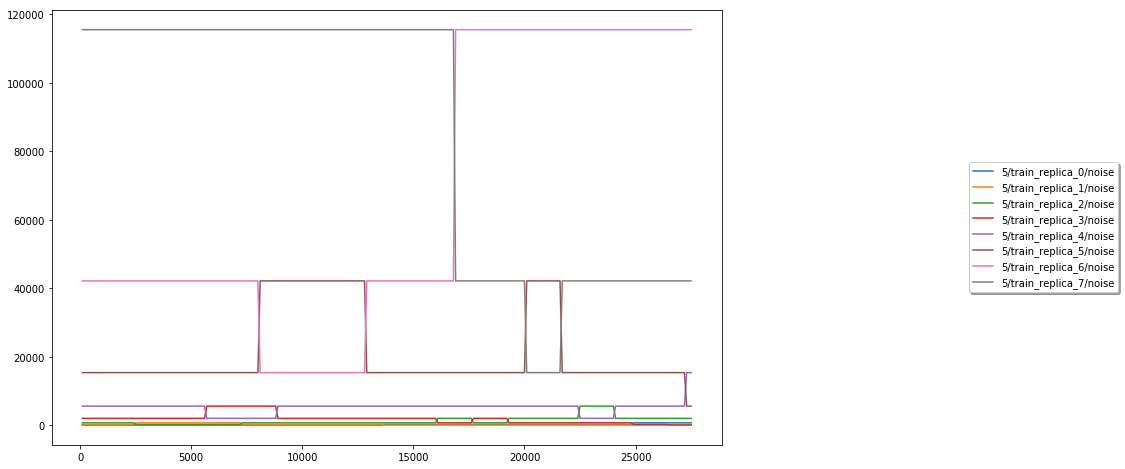

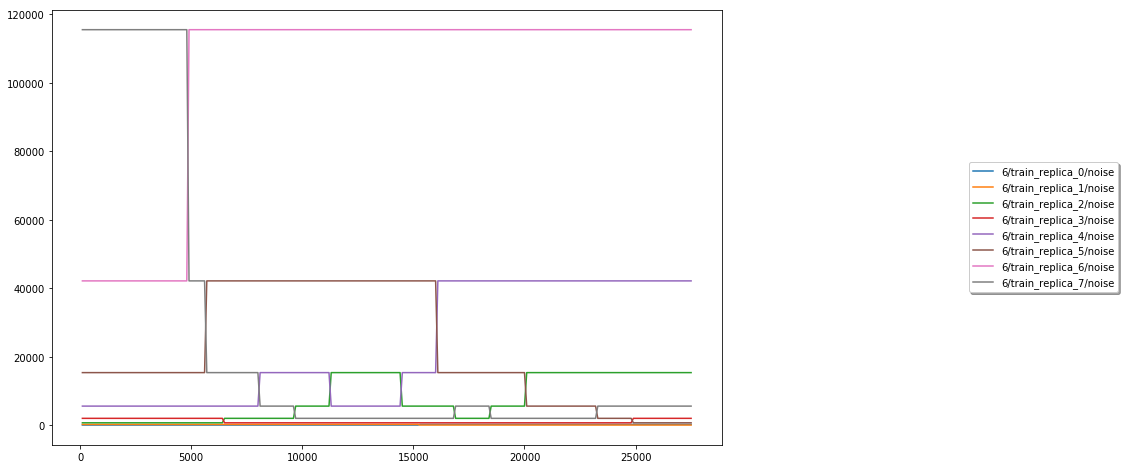

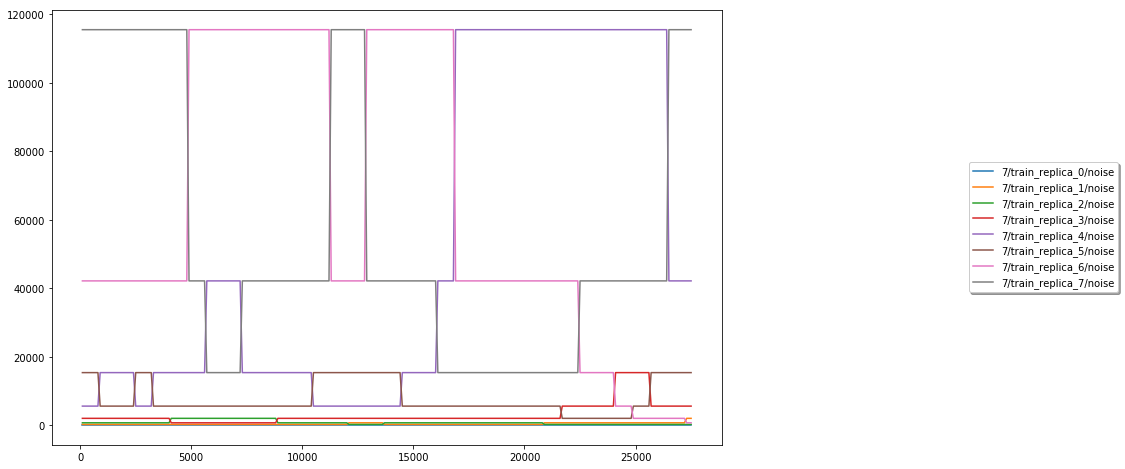

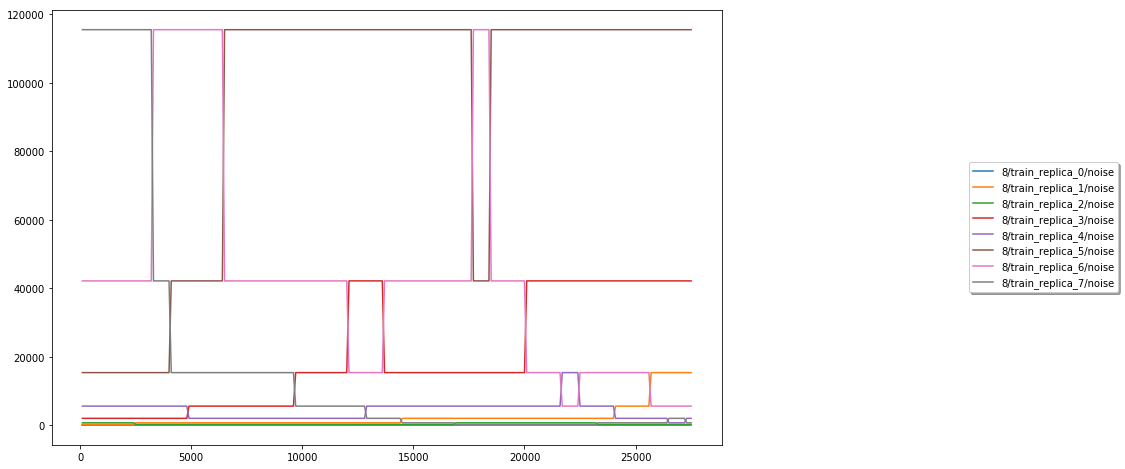

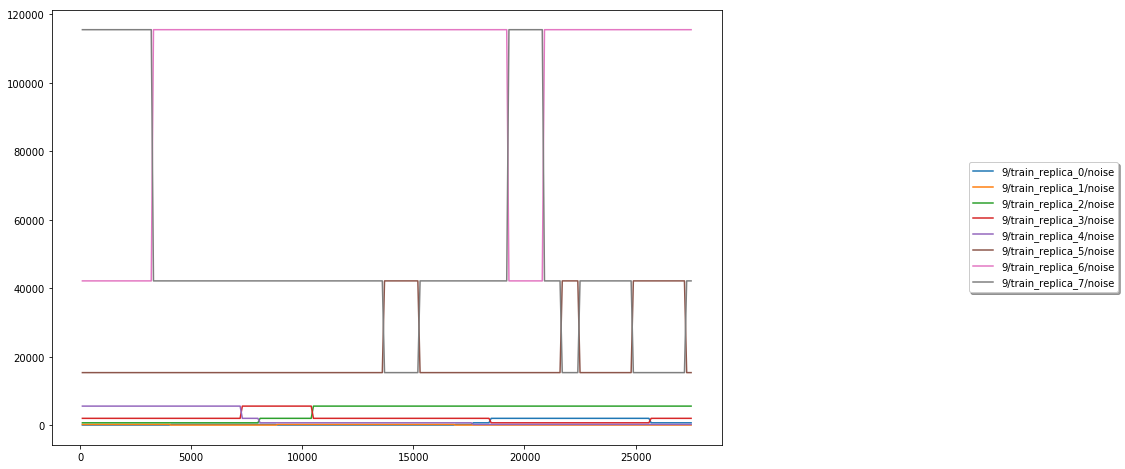

In [11]:
"""swaps for temperature factor=2.74"""
reload(s_utils)
se = s_utils.SummaryExtractor('cnn_mnist_temp_factor_PTLD_dynamic_13')

figs = [se.plot(['noise', 'replica', str(i)+'/t']) for i in range(10)]  


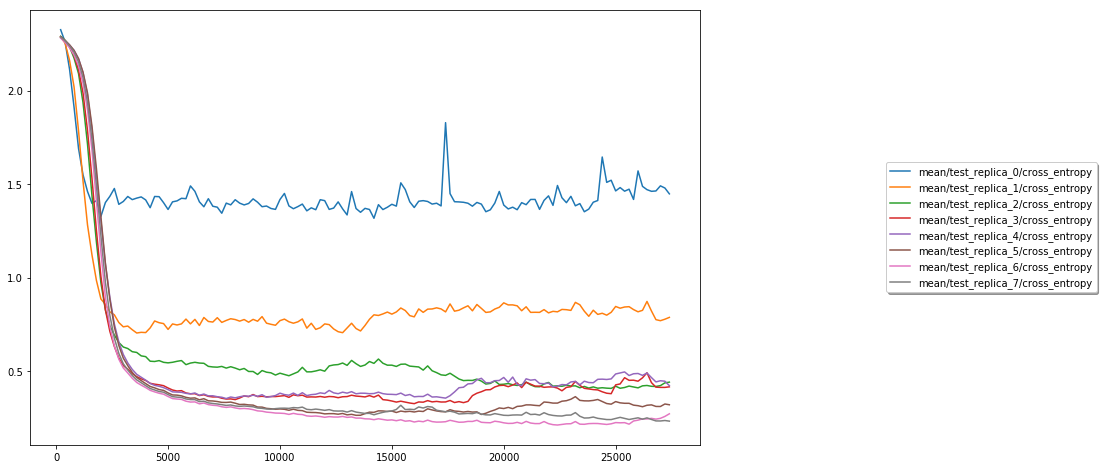

In [12]:
"""Test dataset. mean cross entropy value for test dataset"""
fig = se.plot(['test_replica_', 'cross', 'mean'])

In [13]:
reload(s_utils)
import re
files = [f for f in os.listdir('simulation/summaries/compressed/') if 'cnn' in f and 'temp_factor' in f and 'dynamic' in f]
mese = s_utils.MultiExperimentSummaryExtractor(files)
df = mese.create_df(['accept','ratio','replica'], df_name='df')

10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations
10 simulations


In [14]:
for i in range(15):
    temp_factor = mese1.get_summary_extractor_by_experiment_num(i).get_description()['temp_factor']
    print(temp_factor)
    d = mese1.get_accept_ratio_mean_std_report(df, i)
    
#d = get_accept_ratio_mean_std_report(df, 13)

    pp.pprint(d)

1.0488088481701516
{ 0: {'mean': 1.0, 'stddev': 0.0},
  1: {'mean': 0.9857142865657806, 'stddev': 0.04517539245259918},
  2: {'mean': 1.0, 'stddev': 0.0},
  3: {'mean': 1.0, 'stddev': 0.0},
  4: {'mean': 0.990909093618393, 'stddev': 0.028747970161238146},
  5: {'mean': 1.0, 'stddev': 0.0},
  6: {'mean': 1.0, 'stddev': 0.0},
  7: {'mean': 0.9, 'stddev': 0.31622776601683794}}
1.224744871391589
{ 0: {'mean': 0.951818186044693, 'stddev': 0.06937342094906963},
  1: {'mean': 0.9319108664989472, 'stddev': 0.06414560409615437},
  2: {'mean': 0.9252777755260467, 'stddev': 0.0703027196773326},
  3: {'mean': 0.9599567115306854, 'stddev': 0.06701223238461518},
  4: {'mean': 0.9513888895511627, 'stddev': 0.06588078668113564},
  5: {'mean': 0.970555555820465, 'stddev': 0.047865982483105265},
  6: {'mean': 0.9177777767181396, 'stddev': 0.11390921088342221},
  7: {'mean': 0.8934090971946717, 'stddev': 0.16168323916208904}}
1.4142135623730951
{ 0: {'mean': 0.7215584516525269, 'stddev': 0.21528621890236

In [19]:
mean_of_means_list = []
mean_of_stddevs_list = []
stddev_of_means_list = []
stddev_of_stddevs_list = []
temp_factors_list = []

for i in range(15):
    temp_factor = mese1.get_summary_extractor_by_experiment_num(i).get_description()['temp_factor']
    print(temp_factor)
    temp_factors_list.append(temp_factor)
    report = mese1.get_accept_ratio_mean_std_report(df, i)
    mean_of_means = mese1.get_mean_of_means_from_report(report)
    mean_of_stddevs = mese1.get_mean_of_stddevs_from_report(report)
    stddev_of_means = mese1.get_stddev_of_means_from_report(report)
    stddev_of_stddevs = mese1.get_stddev_of_stddevs_from_report(report)
    mean_of_means_list.append(mean_of_means)
    mean_of_stddevs_list.append(mean_of_stddevs)
    stddev_of_means_list.append(stddev_of_means)
    stddev_of_stddevs_list.append(stddev_of_stddevs)
    d = {
    
    'mean_of_means' : mean_of_means,
    'mean_of_stddevs' : mean_of_stddevs,
    'stddev_of_means' : stddev_of_means,
    'stddev_of_stddevs' :stddev_of_stddevs
    }
#d = get_accept_ratio_mean_std_report(df, 13)

    pp.pprint(d)

1.0488088481701516
{ 'mean_of_means': 0.9845779225230218,
  'mean_of_stddevs': 0.048768891078834406,
  'stddev_of_means': 0.03460801393054258,
  'stddev_of_stddevs': 0.10944014931535088}
1.224744871391589
{ 'mean_of_means': 0.9377618573606016,
  'mean_of_stddevs': 0.0825216495396155,
  'stddev_of_means': 0.025376963117536035,
  'stddev_of_stddevs': 0.03709075565064536}
1.4142135623730951
{ 'mean_of_means': 0.8416554316878319,
  'mean_of_stddevs': 0.12182128802536582,
  'stddev_of_means': 0.0505010378708231,
  'stddev_of_stddevs': 0.04307617751901995}
1.5811388300841898
{ 'mean_of_means': 0.8248481061309576,
  'mean_of_stddevs': 0.1486835395839769,
  'stddev_of_means': 0.04195732151576969,
  'stddev_of_stddevs': 0.030634901962903464}
1.7320508075688772
{ 'mean_of_means': 0.7530745714902878,
  'mean_of_stddevs': 0.15687870114226748,
  'stddev_of_means': 0.07677960582825401,
  'stddev_of_stddevs': 0.056099400121196276}
1.8708286933869707
{ 'mean_of_means': 0.6802451930940151,
  'mean_of_s

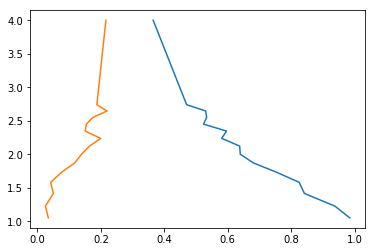

In [28]:
"""Analysis of means of accept ratio"""
fig, ax = plt.subplots()
ax.plot(mean_of_means_list, temp_factors_list, label='mean_of_means')
ax.plot(stddev_of_means_list, temp_factors_list, label='stddev_of_means')
#ax.plot(mean_of_stddevs_list, temp_factors_list, label='mean_of_stddevs')



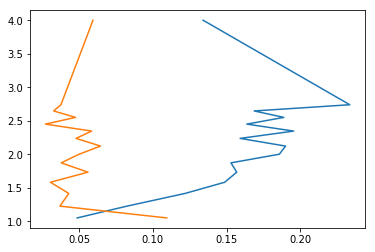

In [29]:
fig, ax = plt.subplots()
ax.plot(mean_of_stddevs_list, temp_factors_list)
ax.plot(stddev_of_stddevs_list, temp_factors_list)